In [179]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from imblearn.under_sampling import RandomUnderSampler
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from xgboost import  XGBClassifier
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.svm import SVC

**Data Collection and Processing**

In [180]:
# Loading the Csv
heart_data = pd.read_csv('/content/Heart Disease - Heart Disease.csv')

In [181]:
heart_data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [182]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115255 entries, 0 to 115254
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      115255 non-null  object 
 1   BMI               115255 non-null  float64
 2   Smoking           115255 non-null  object 
 3   AlcoholDrinking   115255 non-null  object 
 4   Stroke            115254 non-null  object 
 5   PhysicalHealth    115254 non-null  float64
 6   MentalHealth      115254 non-null  float64
 7   DiffWalking       115254 non-null  object 
 8   Sex               115254 non-null  object 
 9   AgeCategory       115254 non-null  object 
 10  Race              115254 non-null  object 
 11  Diabetic          115254 non-null  object 
 12  PhysicalActivity  115254 non-null  object 
 13  GenHealth         115254 non-null  object 
 14  SleepTime         115254 non-null  float64
 15  Asthma            115254 non-null  object 
 16  KidneyDisease     11

In [183]:
#  using label encoding
label_encoder = LabelEncoder()


In [184]:
categorical_columns = ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']
for col in categorical_columns:
    heart_data[col] = label_encoder.fit_transform(heart_data[col])

In [185]:
# Normalize numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_columns = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']
heart_data[numerical_columns] = scaler.fit_transform(heart_data[numerical_columns])


In [186]:
heart_data = pd.get_dummies(heart_data, columns=['Sex', 'AgeCategory', 'Race'], drop_first=True)


In [187]:
#'HeartDisease' column to binary (1: Yes, 0: No)
heart_data['HeartDisease'] = heart_data['HeartDisease'].apply(lambda x: 1 if x == 'Yes' else 0)


In [188]:
# Check for missing values and handle them if necessary
print(heart_data.isnull().sum())

HeartDisease               0
BMI                        0
Smoking                    0
AlcoholDrinking            0
Stroke                     0
PhysicalHealth             1
MentalHealth               1
DiffWalking                0
Diabetic                   0
PhysicalActivity           0
GenHealth                  0
SleepTime                  1
Asthma                     0
KidneyDisease              0
SkinCancer                 0
Sex_Male                   0
AgeCategory_25-29          0
AgeCategory_30-34          0
AgeCategory_35-39          0
AgeCategory_40-44          0
AgeCategory_45-49          0
AgeCategory_50-54          0
AgeCategory_55-59          0
AgeCategory_60-64          0
AgeCategory_65-69          0
AgeCategory_70-74          0
AgeCategory_75-79          0
AgeCategory_80 or older    0
Race_Asian                 0
Race_Black                 0
Race_Hispanic              0
Race_Other                 0
Race_White                 0
dtype: int64


In [189]:
# checking the distribution of the HeartDisease variable
heart_data["HeartDisease"].value_counts()

0    105171
1     10084
Name: HeartDisease, dtype: int64

**Splitting the Features and Target**

In [190]:
X = heart_data.drop(columns=['HeartDisease'])
y = heart_data['HeartDisease']


In [191]:
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

In [192]:
X.shape

(115255, 32)

In [193]:
y.shape

(115255,)

In [194]:
#Splitting the Data into Training & Test Data

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [195]:
X.shape, X_train.shape, X_test.shape

((115255, 32), (16134, 32), (4034, 32))

In [196]:
y.shape, y_train.shape, y_test.shape

((115255,), (16134,), (4034,))

**Model Training**

Logistic Regression

In [197]:
m1="Logistic Regression"
lr_model = LogisticRegression(solver="liblinear",random_state=2 )
# training the model with training data
lr_model.fit(X_train, y_train)
# Accuracy on training data
X_train_prediction = lr_model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,y_train)
print(f"Accuracy on Training data: ",training_data_accuracy*100)
# Accuracy on test data
X_test_prediction = lr_model.predict(X_test)
test_data_accuracy_lr = accuracy_score(X_test_prediction, y_test)
print(f"Accuracy on Test data: ",test_data_accuracy_lr*100)

#Confussion matrix
LR_conf_matrix = confusion_matrix(y_test, X_test_prediction)
print("Confussion matrix")
print(LR_conf_matrix)

Accuracy on Training data:  75.22623032106111
Accuracy on Test data:  75.6817055032226
Confussion matrix
[[1489  517]
 [ 464 1564]]


Random Forest

In [198]:
m2="Random Forest"
rf = RandomForestClassifier(n_estimators=100, criterion="entropy",max_depth=7, min_samples_leaf=2, max_features="sqrt",random_state=2)
# training the model with training data
rf.fit(X_train,y_train)
# Accuracy on training data
X_train_prediction = rf.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,y_train)
print(f"Accuracy on Training data: ",training_data_accuracy*100)

# Accuracy on test data
X_test_prediction = rf.predict(X_test)
test_data_accuracy_rf = accuracy_score(X_test_prediction, y_test)
print(f"Accuracy on Test data: ",test_data_accuracy_rf*100)

#Confussion matrix
rf_conf_matrix = confusion_matrix(y_test, X_test_prediction)
print("Confussion matrix")
print(rf_conf_matrix)

Accuracy on Training data:  74.86674104375852
Accuracy on Test data:  73.8968765493307
Confussion matrix
[[1468  538]
 [ 515 1513]]


KNN

In [199]:
m3="K-Neighbour"
knn = KNeighborsClassifier(n_neighbors=20, algorithm="auto" )
# train on the training set
knn.fit(X_train, y_train)
# Accuracy on training data
X_train_predict= knn.predict(X_train)
training_data_accuracy=accuracy_score(X_train_predict, y_train)
print(f"Accuracy on Training data: ",training_data_accuracy*100)
# Accuracy on test data
X_test_predict= knn.predict(X_test)
test_data_accuracy_knn=accuracy_score(X_test_predict, y_test)
print(f"Accuracy on Test data: ",test_data_accuracy_knn*100)
#Confussion matrix
knn_confusion_matrix=  confusion_matrix(y_test,X_test_predict)
print("Confusion Matrix")
print(knn_confusion_matrix)

Accuracy on Training data:  76.07536878641379
Accuracy on Test data:  73.69856222112048
Confusion Matrix
[[1496  510]
 [ 551 1477]]


XGB

In [200]:
m4="XGB"
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
# Accuracy on training data
X_train_predict= xgb.predict(X_train)
training_data_accuracy=accuracy_score(X_train_predict, y_train)
print(f"Accuracy on Training data: ",training_data_accuracy*100)
# Accuracy on test data
X_test_predict= xgb.predict(X_test)
test_data_accuracy_xgb=accuracy_score(X_test_predict, y_test)
print(f"Accuracy on Test data: ",test_data_accuracy_xgb*100)
#Confussion matrix
XGB_confusion_matrix=  confusion_matrix(y_test,X_test_predict)
print("Confusion Matrix")
print(XGB_confusion_matrix)

Accuracy on Training data:  85.7381926366679
Accuracy on Test data:  74.93802677243431
Confusion Matrix
[[1450  556]
 [ 455 1573]]


SVM

In [201]:
m5="svc"
svc = SVC(C=5,kernel="rbf")
svc.fit(X_train, y_train)
# Accuracy on training data
X_train_predict= svc.predict(X_train)
training_data_accuracy=accuracy_score(X_train_predict, y_train)
print(f"Accuracy on Training data: ",training_data_accuracy*100)
# Accuracy on test data
X_test_predict= svc.predict(X_test)
test_data_accuracy_svc=accuracy_score(X_test_predict, y_test)
print(f"Accuracy on Test data: ",test_data_accuracy_svc*100)
#Confussion matrix
svc_confusion_matrix =  confusion_matrix(y_test,X_test_predict)
print("Confusion Matrix")
print(svc_confusion_matrix)

Accuracy on Training data:  79.67645965042766
Accuracy on Test data:  75.28507684680218
Confusion Matrix
[[1411  595]
 [ 402 1626]]


ANN

In [202]:
from sklearn.neural_network import MLPClassifier
m6="ANN"
ann = MLPClassifier (hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)

ann.fit(X_train, y_train)
# Accuracy on training data
X_train_predict= ann.predict(X_train)
training_data_accuracy=accuracy_score(X_train_predict, y_train)
print(f"Accuracy on Training data: ",training_data_accuracy*100)
# Accuracy on test data
X_test_predict= ann.predict(X_test)
test_data_accuracy_ann=accuracy_score(X_test_predict, y_test)
print(f"Accuracy on Test data: ",test_data_accuracy_ann*100)
#Confussion matrix
ann_confusion_matrix =  confusion_matrix(y_test,X_test_predict)
print("Confusion Matrix")
print(ann_confusion_matrix)

Accuracy on Training data:  87.0149993801909
Accuracy on Test data:  70.64947942488845
Confusion Matrix
[[1338  668]
 [ 516 1512]]


AdaBoost

In [203]:
m7="AdaBoost"
AdaBoost = AdaBoostClassifier()
AdaBoost.fit(X_train, y_train)
# Accuracy on training data
X_train_predict= AdaBoost.predict(X_train)
training_data_accuracy=accuracy_score(X_train_predict, y_train)
print(f"Accuracy on Training data: ",training_data_accuracy*100)
# Accuracy on test data
X_test_predict= AdaBoost.predict(X_test)
test_data_accuracy_AdaBoost=accuracy_score(X_test_predict, y_test)
print(f"Accuracy on Test data: ",test_data_accuracy_AdaBoost*100)
#Confussion matrix
AdaBoost_confusion_matrix =  confusion_matrix(y_test,X_test_predict)
print("Confusion Matrix")
print(AdaBoost_confusion_matrix)

Accuracy on Training data:  76.43485806371638
Accuracy on Test data:  76.17749132374814
Confusion Matrix
[[1510  496]
 [ 465 1563]]


Decision Tree

In [205]:
m8 = "Decision Tree"
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)
# Accuracy on training data
X_train_predict= dt.predict(X_train)
training_data_accuracy=accuracy_score(X_train_predict, y_train)
print(f"Accuracy on Training data: ",training_data_accuracy*100)
# Accuracy on test data
X_test_predict= AdaBoost.predict(X_test)
test_data_accuracy_dt=accuracy_score(X_test_predict, y_test)
print(f"Accuracy on Test data: ",test_data_accuracy_dt*100)
#Confussion matrix
dt_confusion_matrix =  confusion_matrix(y_test,X_test_predict)
print("Confusion Matrix")
print(dt_confusion_matrix)

Accuracy on Training data:  69.81529688855832
Accuracy on Test data:  76.17749132374814
Confusion Matrix
[[1510  496]
 [ 465 1563]]


**Result**

In [206]:
results = {"Models": [m1, m2, m3 ,m4, m5, m6,m7,m8],
           "Accuracy": [test_data_accuracy_lr, test_data_accuracy_rf,test_data_accuracy_knn, test_data_accuracy_xgb,test_data_accuracy_svc, test_data_accuracy_ann, test_data_accuracy_AdaBoost, test_data_accuracy_dt ]}

for (key, value) in results.items():
    if key=="Accuracy":
        results[key]=  [item*100 for item in results[key]]


result_df=pd.DataFrame(results)

In [207]:
result_df

,Models,Accuracy
0,Logistic Regression,75.681706
1,Random Forest,73.896877
2,K-Neighbour,73.698562
3,XGB,74.938027
4,svc,75.285077
5,ANN,70.649479
6,AdaBoost,76.177491
7,Decision Tree,76.177491


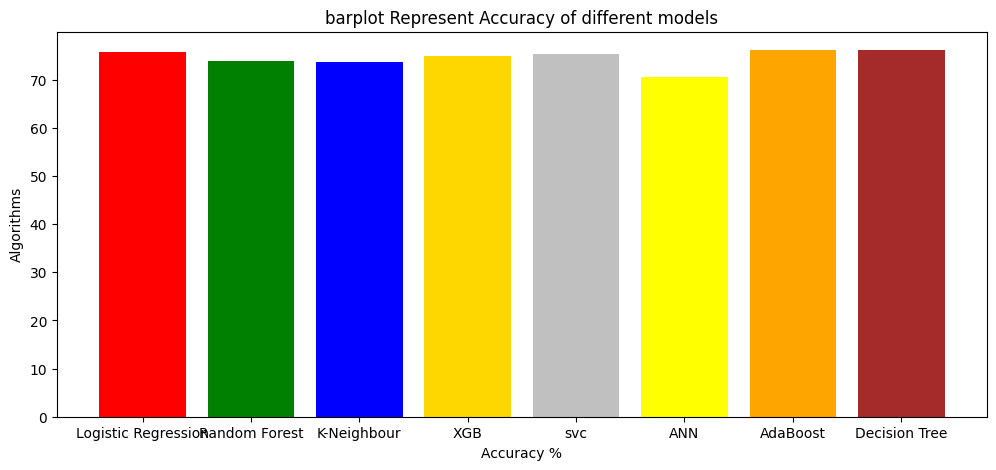

In [208]:
colors = ['red','green','blue','gold','silver','yellow','orange','brown']
plt.figure(figsize=(12,5))
plt.title("barplot Represent Accuracy of different models")
plt.xlabel("Accuracy %")
plt.ylabel("Algorithms")
plt.bar(result_df['Models'],result_df['Accuracy'],color = colors)
plt.show()